<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Для этого разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. 

Нужно будет защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель по условиям задания не требуется.

# Описание данных

**Признаки:**

пол, возраст и зарплата застрахованного, количество членов его семьи.

**Целевой признак:** 

количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import inv
from sklearn.metrics import r2_score
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')
pth = '/content/9_insurance.csv'
pth_1 = 'C:\insurance.csv'
try:
    df = pd.read_csv(pth)
except:
    df = pd.read_csv(pth_1)


In [ ]:
df.head(10) #посмотрим на общий вид таблицы

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [ ]:
df.info() #изучим общую информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [ ]:
df['Возраст'] = df['Возраст'].astype(int) #данные в колонках Возраст и Зарплата стоит привести к целочисленным значениям
df['Зарплата'] = df['Зарплата'].astype(int)

In [ ]:
df.duplicated().sum() # проверим данные на наличие явных дубликатов

153

In [ ]:
df = df.drop_duplicates().reset_index(drop=True) #удалим явные дубликаты из таблицы

In [ ]:
df.describe() #рассмотрим как распределяются данные в датасете

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811223,1.203425,0.152259
std,0.500049,8.487995,9972.952441,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Все цифры имеют логичный порядок, явных выбросов нет, возможно ошибка есть в данных по строкам с минимальным количеством членов семьи равным 0, но вряд ли она повлияет на результаты исследования.

In [ ]:
df[df['Члены семьи']==0].head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
2,0,29,21000,0,0
4,1,28,26100,0,0
11,1,38,29300,0,0
13,0,21,55000,0,0
15,1,34,23300,0,0
18,1,42,49700,0,1
19,1,27,36900,0,0
22,0,41,26600,0,0
28,1,19,36800,0,0
30,0,25,46300,0,0


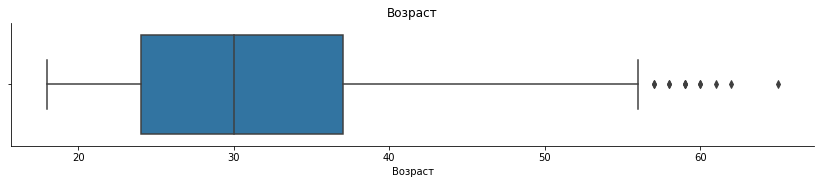

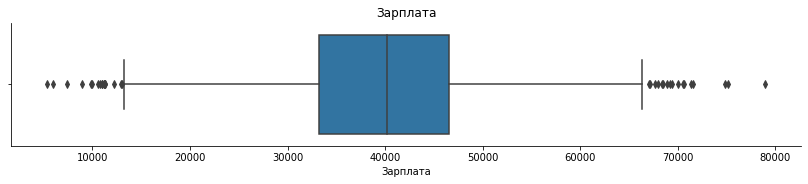

In [ ]:
for column in ['Возраст', 'Зарплата']:
    g = sns.catplot(x= column,kind='box',data=df)
    g.fig.set_figwidth(12)
    g.fig.set_figheight(2)
    plt.title(column) 
    plt.show

Распределение данных по признакам возраста и зарплаты показывает, что средний возраст страхуемого 30 лет и он получает зарплату около 40000 рублей. От выбросов 56 и выше лет и зарплат до 13500 и от 66000 рублей следует избавиться.

In [ ]:
df = df.query('Возраст < 56 & Зарплата >13500 & Зарплата <66000')

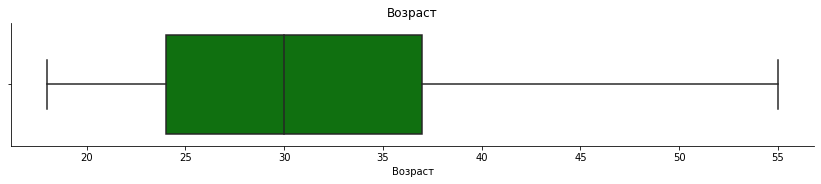

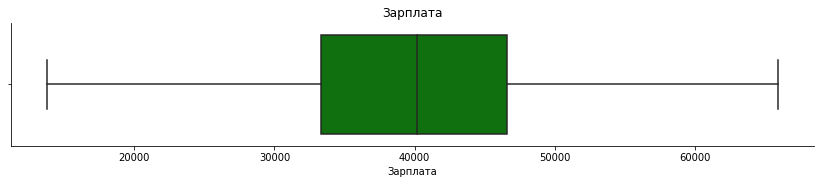

In [ ]:
for column in ['Возраст', 'Зарплата']:
    g = sns.catplot(x= column,kind='box',data=df, color = 'green')
    g.fig.set_figwidth(12)
    g.fig.set_figheight(2)
    plt.title(column) 
    plt.show

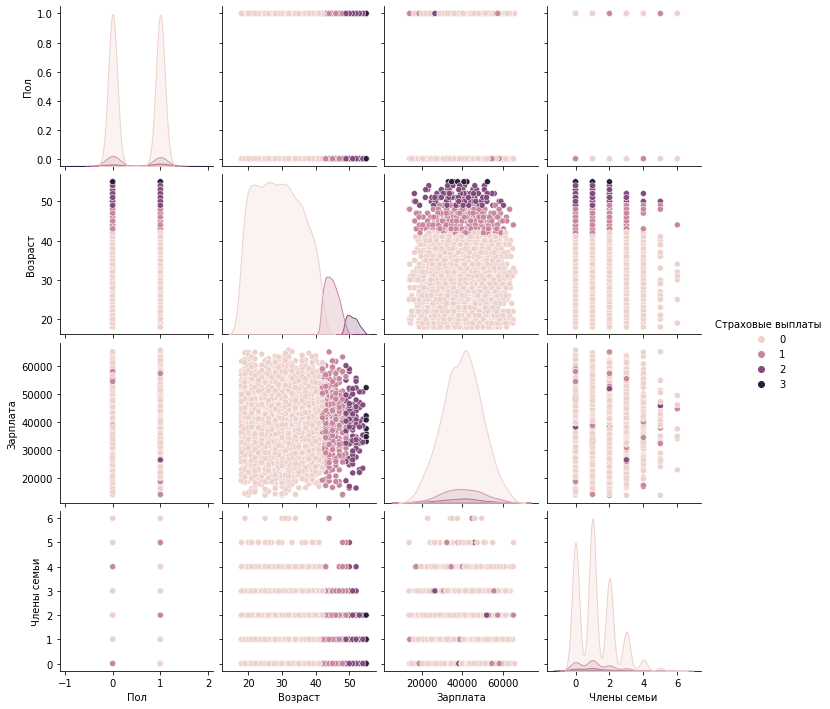

In [ ]:
sns.pairplot(df, hue='Страховые выплаты'); #посмотрим на взаимосвязь признаков 

Можно отметить, что чем выше возраст страхуемого, тем больше страховых выплат он успел получить.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Проверим, изменятся ли предсказания модели, если умножим признаки на обратимую квадратную матрицу  **P**

**Ответ:** При умножении признаков на обратимую матрицу качество линейной регрессии не меняется.

**Обоснование:** Представлено ниже.

$a_1 = XPw = XP((XP)^T XP)^{-1}(XP)^T y$: подставляем в исходную формулу признаки, умноженные на $P$

$= XP(P^T X^T XP)^{-1} P^T X^T y$: раскрываем транспонирование матриц по свойству $(XP)^T = P^T X^T$ (транспонированное произведение матриц равно произведению транспонированных матриц, взятых в обратном порядке)

$= XPP^{-1}(X^T X)^{-1} (P^T)^{-1} P^T X^T y$: так как матрицы $P, P^T,X^T X$ - квадратные, к ним применимо действия раскрытия: $(AB)^{-1}=A^{-1}B^{-1}$, выносим квадратные матрицы $P$ и $P^T$ за скобки  

$= XE(X^T X)^{-1}E X^T y$: так как произведение квадратной матрицы на её обратную матрицу дает единичную матрицу меняем соответсвующие произведения $PP^{-1}$ на $E$ 

$= X(X^T X)^{-1} X^T y$: при умножении любой матрицы на единичную, исходная матрица не изменяется, убираем единичную матрицу из формулы

$= Xw = a$: таким образом мы доказали, что предсказания модели не изменятся при умножении признаков на случайную обратимую матрицу


## Алгоритм преобразования

**Алгоритм**

Для преобразования исходных данных будем использовать алгоритм умножения исходных признаков на случайную обратимую матрицу. Это позволит собеспечить конфиденциальность данных клиентов страховой компании.
В конце выполнения алгоритма производится сравнение метрик r2 на исходных и зашифрованных признаках.

**Обоснование**

Исходя из проверки результатов умножения признаков на случайную обратимую матрицу, предсказания модели для исходных признаков и признаков, помноженных на обратимую матрицу, останутся неизменными.

## Проверка алгоритма

In [ ]:
features = df.drop('Страховые выплаты',axis=1)#выделим признаки в данных
target = df['Страховые выплаты'] #выделим целевой признак в данных
P = np.random.normal(size=(len(features.columns),len(features.columns))) # создадим случайную обратимую матрицу, размерами соответствующую количеству признаков
P_inv = np.linalg.inv(P)#проверка матрицы на обратимость
print(P) # выводим на экран случайную обратимую матрицу
print(' ')
print(P_inv)# выводим на экран обратную матрицу

[[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753]]
 
[[-0.33124857 -1.0333483  -2.21070923 -0.47651024]
 [ 0.12864778 -0.47781825  0.15271687 -0.43017975]
 [-0.51338817  0.33588835 -0.8347692  -0.24072429]
 [ 0.99462192  0.15079316  1.08985145  0.21872535]]


In [ ]:
class LinearRegression: # создаем класс линейной регрессии
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1) #добавляем первый столбец с единицами в матрицу с признаками
        y = train_target
        w = (np.linalg.inv(X.T @ X)) @ X.T @ y #находим значения весов при котором MSE будет минимальным
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features @ self.w + self.w0 #возвращаем предсказания модели

In [ ]:
model = LinearRegression() #проверим алгоритм на исходных признаках
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.41957905929460615


In [ ]:
features_inv = features @ P #проверим алгоритм на признаках, умноженных на обратимую матрицу
model = LinearRegression()
model.fit(features_inv, target)
predictions = model.predict(features_inv)
print(r2_score(target, predictions))

0.41957905929460393


Как видно, R2 метрика одинакова для исходных признаков и признаков, измененных на обратимую матрицу, что подтверждает наши доказательства об отсутвии влияния умножения признаков на обратимую матрицу на качество модели.

## Общий вывод ##

В ходе выполнения проекта мы проанализировали и подготовили данные к дальнейшему исследованию, наглядно доказали, что умножение матрицы на случайную обратимую матрицу не влияет на предсказания и на качество модели. Это дало нам основания для использования данного метода для обеспечения конфиденциальности данных клиентов страховой компании. Применение измененных данных позволит скрыть информацию о клиентах при сохранении качества предсказаний целевого признака.